## Problem statement

**Quantifying the Impact of Mining-Related PM2.5 Air Pollution on Public Health and Identifying High-Risk Communities in South Africa for Targeted Interventions**


*In South Africa, annual mean PM2.5 concentrations typically range from 10-30 μg m-3. Consequently, many South Africans are exposed to PM2.5 concentrations which exceed the annual average concentration guidelines of the national government (20 μg m-3) and World Health Organisation (5 μg m-3). Overall,  PM2.5 contributes to approximately 25,800 premature deaths each year in South Africa. These premature deaths, combined with other non-fatal illnesses caused by PM2.5, cost the South African economy USD 15 billion each year, which is equivalent to ZAR 250 billion and  5.2% of the country’s Gross Domestic Product.*
https://energyandcleanair.org/publication/air-quality-impacts-of-the-new-largo-coal-mine/


*Air pollution accounted for some 3,365 deaths of children under five years across South Africa in 2021.https://www.unicef.org/southafrica/press-releases/air-pollution-accounted-some-3365-deaths-children-under-five-years-across-south*


In [2]:
import numpy as np
import pandas as pd

c:\Users\pales\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [24]:
pd.set_option('display.max_columns', 100)

## Data Exploration

In [28]:

facilities_data=pd.read_csv('health_system_za_hospitals_v1.csv')
cities_data=pd.read_csv('za_cities_predictions.csv')

In [6]:
facilities_data.head()

Name       Long      Lat              Category  \
0        Fort England Hospital   26.54361 -33.3156  Specialised Hospital   
1       Fort Beaufort Hospital  26.633571 -32.7802     District Hospital   
2              Bhisho Hospital   27.45516 -32.8277     District Hospital   
3                Grey Hospital   27.39579 -32.8793     District Hospital   
4  St Francis Chronic Hospital   26.69921 -30.6887     District Hospital   

       Province                                District  \
0  Eastern Cape    Sarah Baartman District Municipality   
1  Eastern Cape          Amathole District Municipality   
2  Eastern Cape  Buffalo City Metropolitan Municipality   
3  Eastern Cape  Buffalo City Metropolitan Municipality   
4  Eastern Cape         Joe Gqabi District Municipality   

                         Subdistrict  \
0          Makana Local Municipality   
1  Raymond Mhlaba Local Municipality   
2          Buffalo City Sub-District   
3          Buffalo City Sub-District   
4   Walter Sisulu Local Municipality   

  Uses DATCOV19 surveillance online platform  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

                   Main Health care Services Offered   Size  Beds Usable  \
0               Psychiatry and Occupational Services  Large        313.0   
1  Surgical Services,Medical Services, Paediatric...    NaN         70.0   
2  Anti-Retroviral Treatment Services (ARVs), Eme...    NaN        205.0   
3  Emergency department, Paediatric ward, Materni...    NaN         67.0   
4  The hospital services include Pharmacy, Anti-R...    NaN         26.0   

   Beds Approved  Beds Surgical Usable  Beds Surgical Approved  \
0            NaN                   NaN                     NaN   
1           70.0                  15.0                    15.0   
2          205.0                  40.0                    40.0   
3           67.0                  18.0                    18.0   
4           26.0                   0.0                     0.0   

   Surgeons Qualified  Surgeons_unqualified  Theatres  Total number of beds  \
0                 NaN                   NaN       NaN                 313.0   
1                 0.0                   2.0       1.0                   NaN   
2                 0.0                   3.0       2.0                   NaN   
3                 0.0                   4.0       1.0                   NaN   
4                 0.0                   0.0       0.0                   NaN   

   Total number of staff Cluster  \
0                    NaN     NaN   
1                    NaN     NaN   
2                    NaN     NaN   
3                    NaN     NaN   
4                    NaN     NaN   

                                             Webpage Geo_subdivision  \
0  http://doctors-hospitals-medical-cape-town-sou...           ZA-EC   
1  http://doctors-hospitals-medical-cape-town-sou...           ZA-EC   
2  http://doctors-hospitals-medical-cape-town-sou...           ZA-EC   
3  http://doctors-hospitals-medical-cape-town-sou...           ZA-EC   
4  http://doctors-hospitals-medical-cape-town-sou...           ZA-EC   

  Is Vaccination site  
0                 NaN  
1                 YES  
2                 NaN  
3                 NaN  
4                 NaN

In [47]:
df = facilities_data[['Name', 'Long', 'Lat','Category' ,'Province', 'District', 'Main Health care Services Offered']]


from the above hospital data we do not need all the attributes as the data will be used mapping so some of the columns will need to be removed 

In [8]:
facilities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Name                                        899 non-null    object 
 1   Long                                        892 non-null    object 
 2   Lat                                         892 non-null    float64
 3   Category                                    899 non-null    object 
 4   Province                                    899 non-null    object 
 5   District                                    893 non-null    object 
 6   Subdistrict                                 893 non-null    object 
 7   Uses DATCOV19 surveillance online platform  406 non-null    object 
 8   Main Health care Services Offered           894 non-null    object 
 9   Size                                        32 non-null     object 
 10  Beds Usable   

In [9]:
facilities_data.shape

(899, 23)

We can see that there are some columns with missing data which implies that if we are to keep those columns then we will need to do some data cleaning on them

In [11]:
df.head()

Name       Long      Lat              Category  \
0        Fort England Hospital   26.54361 -33.3156  Specialised Hospital   
1       Fort Beaufort Hospital  26.633571 -32.7802     District Hospital   
2              Bhisho Hospital   27.45516 -32.8277     District Hospital   
3                Grey Hospital   27.39579 -32.8793     District Hospital   
4  St Francis Chronic Hospital   26.69921 -30.6887     District Hospital   

       Province                                District  \
0  Eastern Cape    Sarah Baartman District Municipality   
1  Eastern Cape          Amathole District Municipality   
2  Eastern Cape  Buffalo City Metropolitan Municipality   
3  Eastern Cape  Buffalo City Metropolitan Municipality   
4  Eastern Cape         Joe Gqabi District Municipality   

                   Main Health care Services Offered  
0               Psychiatry and Occupational Services  
1  Surgical Services,Medical Services, Paediatric...  
2  Anti-Retroviral Treatment Services (ARVs), Eme...  
3  Emergency department, Paediatric ward, Materni...  
4  The hospital services include Pharmacy, Anti-R...

In [48]:
df.columns

Index(['Name', 'Long', 'Lat', 'Category', 'Province', 'District',
       'Main Health care Services Offered'],
      dtype='object')

In [12]:
data=cities_data.copy()

In [34]:
data.head(20)

City        Date        Lat       Long  Predicted_PM25  \
0   Johannesburg  2019-01-01 -26.205171  28.049815       54.230453   
1   Johannesburg  2019-01-02 -26.205171  28.049815       55.092041   
2   Johannesburg  2019-01-03 -26.205171  28.049815       50.152136   
3   Johannesburg  2019-01-04 -26.205171  28.049815       49.554493   
4   Johannesburg  2019-01-05 -26.205171  28.049815       50.136486   
5   Johannesburg  2019-01-06 -26.205171  28.049815       58.741518   
6   Johannesburg  2019-01-07 -26.205171  28.049815       51.994974   
7   Johannesburg  2019-01-08 -26.205171  28.049815       56.256577   
8   Johannesburg  2019-01-09 -26.205171  28.049815       59.825568   
9   Johannesburg  2019-01-10 -26.205171  28.049815       58.147661   
10  Johannesburg  2019-01-11 -26.205171  28.049815       56.909819   
11  Johannesburg  2019-01-12 -26.205171  28.049815       60.487127   
12  Johannesburg  2019-01-13 -26.205171  28.049815       60.433863   
13  Johannesburg  2019-01-14 -26.205171  28.049815       66.438233   
14  Johannesburg  2019-01-15 -26.205171  28.049815       55.542357   
15  Johannesburg  2019-01-16 -26.205171  28.049815       66.938508   
16  Johannesburg  2019-01-17 -26.205171  28.049815       70.971404   
17  Johannesburg  2019-01-18 -26.205171  28.049815       66.252476   
18  Johannesburg  2019-01-19 -26.205171  28.049815       59.704903   
19  Johannesburg  2019-01-20 -26.205171  28.049815       62.400172   

    pop_density2010_5000_max  
0                 4153.27832  
1                 4153.27832  
2                 4153.27832  
3                 4153.27832  
4                 4153.27832  
5                 4153.27832  
6                 4153.27832  
7                 4153.27832  
8                 4153.27832  
9                 4153.27832  
10                4153.27832  
11                4153.27832  
12                4153.27832  
13                4153.27832  
14                4153.27832  
15                4153.27832  
16                4153.27832  
17                4153.27832  
18                4153.27832  
19                4153.27832

In [37]:
data['City'].unique()

array(['Johannesburg', 'Cape Town', 'Benoni', 'Durban', 'Pretoria',
       'Vereeniging', 'Port Elizabeth', 'Pietermaritzburg',
       'Bloemfontein', 'Welkom', 'Nelspruit', 'East London',
       'Thohoyandou', 'Springs', 'Uitenhage', 'Polokwane', 'Paarl',
       'Klerksdorp', 'George', 'Rustenburg', 'Kimberley', 'Bhisho',
       'Middelburg', 'Vryheid', 'Umtata', 'Worcester', 'Potchefstroom',
       'Brits', 'Queenstown', 'Mmabatho', 'Kroonstad', 'Bethal',
       'Grahamstown', 'Bethlehem', 'Oudtshoorn', 'Standerton', 'Upington',
       'Saldanha', 'Tzaneen', 'Knysna', 'Graaff-Reinet', 'Port Shepstone',
       'Vryburg', 'Ladysmith', 'Beaufort West', 'Aliwal North',
       'Volksrust', 'Lebowakgomo', 'Cradock', 'De Aar', 'Hermanus',
       'Ulundi', 'Komatipoort', 'Messina', 'Port Alfred', 'Bloemhof',
       'Mossel Bay', 'Bredasdorp', 'Swellendam', 'Colesberg', 'Brandfort',
       'Prieska', 'Springbok', 'Kuruman', 'Port Saint John’s',
       'Carnarvon', 'Pofadder', 'Vanrhynsdorp', 

In [39]:
data.columns

Index(['City', 'Date', 'Lat', 'Long', 'Predicted_PM25',
       'pop_density2010_5000_max'],
      dtype='object')

## Data Visualization

In [62]:
import folium

In [63]:
m = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=5)

# Add heat map layer
from folium.plugins import HeatMap
heat_data = [[row['Lat'], row['Long'], row['Predicted_PM25']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save to HTML
m.save('heatmap.html')

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [68]:
fig = px.scatter_geo(data, lat='Lat', lon='Long', size='pop_density2010_5000_max',
                     color='Predicted_PM25', hover_name='City',
                     projection='natural earth', title='PM2.5 and Population Density')
fig.show()

from the plot here we can see that there is no correlation between the population density and the predicted pm2.5 pollutant 

In [72]:
data['Long'] = pd.to_numeric(data['Long'], errors='coerce')
data['Lat'] = pd.to_numeric(data['Lat'], errors='coerce')

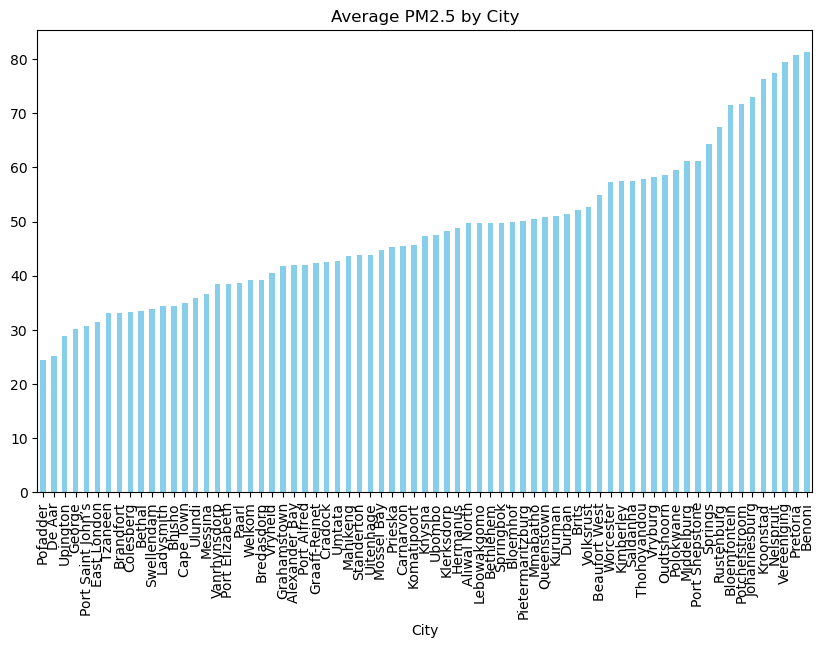

In [74]:
city_pm25 = data.groupby('City')['Predicted_PM25'].mean().sort_values()

# Bar chart
plt.figure(figsize=(10, 6))
city_pm25.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 by City')
plt.xticks(rotation=90)
plt.show()

from this graph we can see that majority of places that are close to mine areas have a  high pm2.5 value on average than places located far from the mines which indicates that the mines might be the biggest contributor to air pollution in South Africa

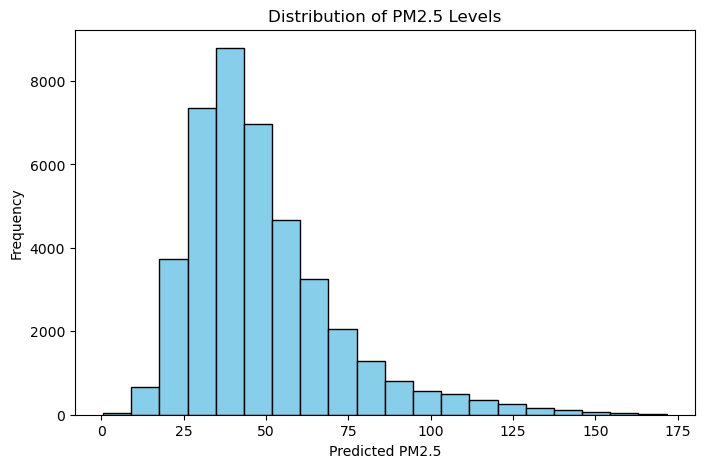

In [78]:
data['Predicted_PM25'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('Predicted PM2.5')
plt.ylabel('Frequency')
plt.show()


With the cities provided we  can see that majority of them have a pm2.5 value which is close to 50 .this is a level high is dangerous for people

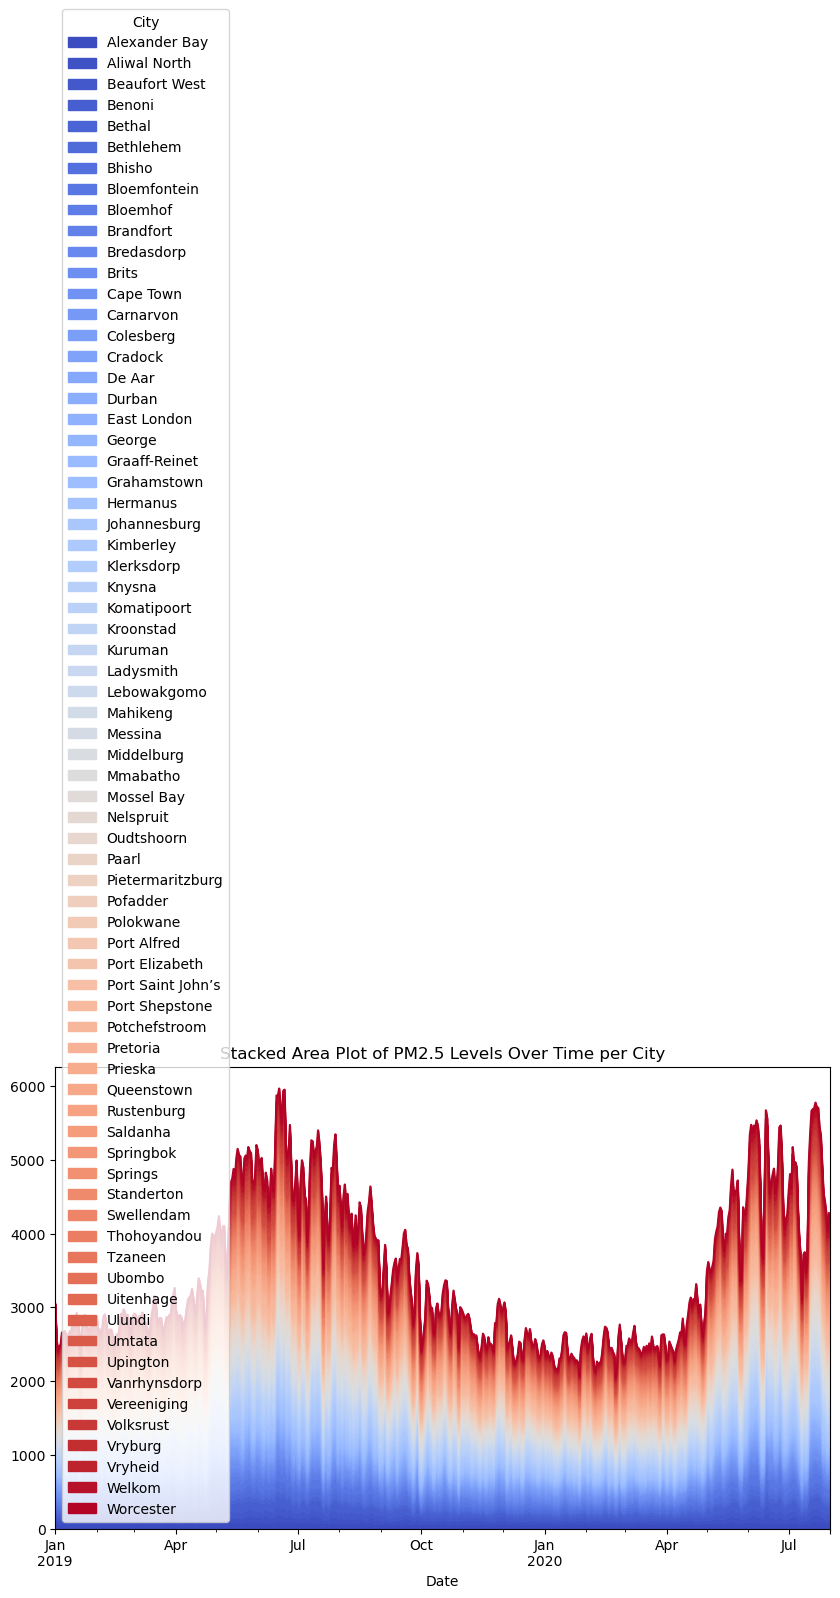

In [80]:
df_pivot = data.pivot_table(values='Predicted_PM25', index='Date', columns='City')
df_pivot.plot(kind='area', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Stacked Area Plot of PM2.5 Levels Over Time per City')
plt.show()


#### Hospital facilities visualization

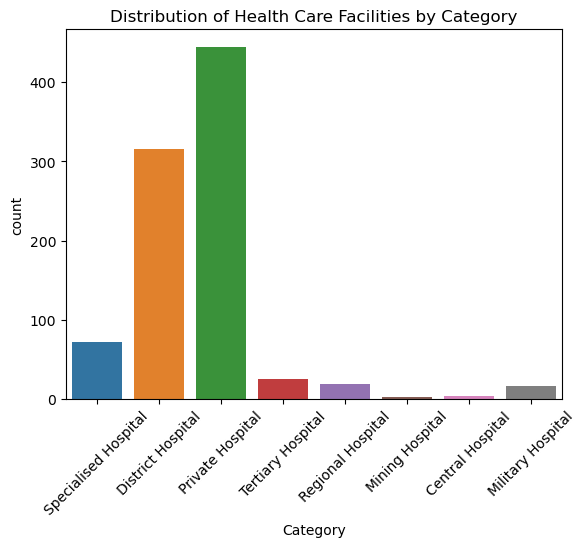

In [86]:
sns.countplot(df, x='Category')
plt.title('Distribution of Health Care Facilities by Category')
plt.xticks(rotation=45)
plt.show()

from the data plotted we can clearly see that the majority of the hospitals in south africa are district hospitals which will be our main focus

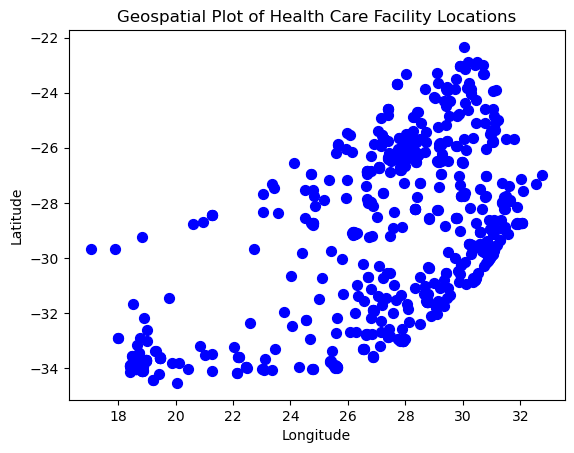

In [87]:
plt.scatter(df['Long'], df['Lat'], c='blue', s=50)
plt.title('Geospatial Plot of Health Care Facility Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


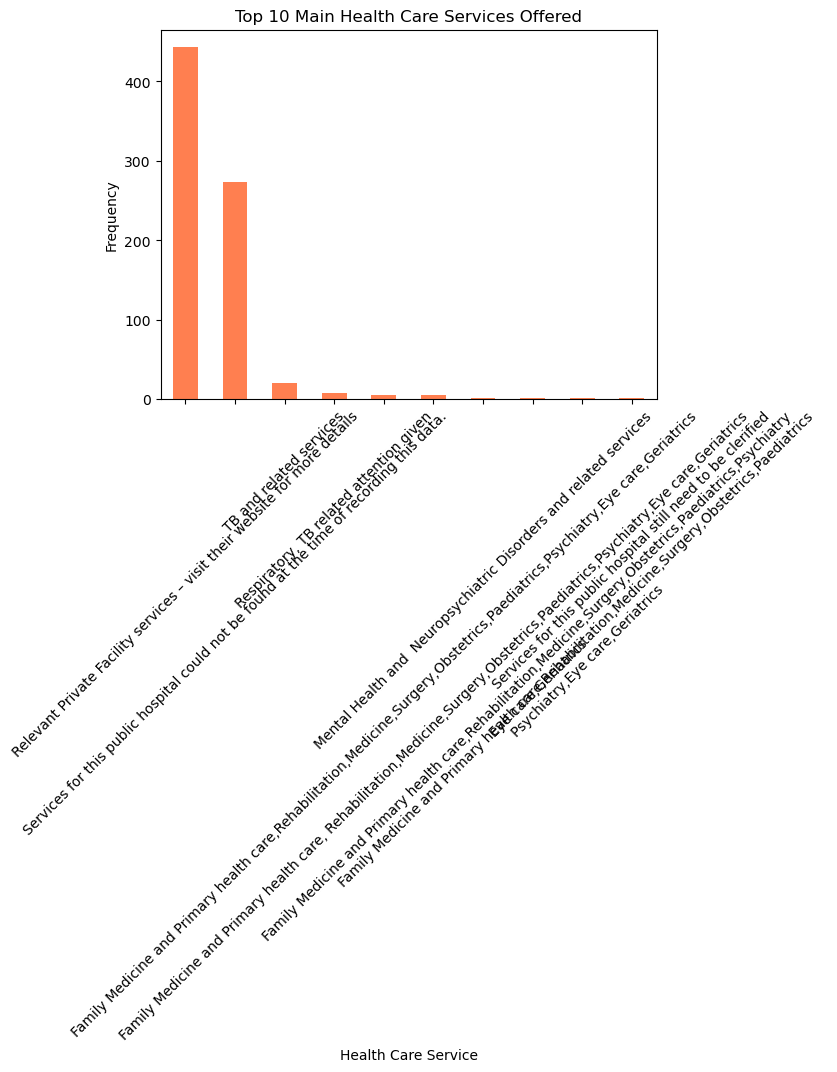

In [88]:
services_count = df['Main Health care Services Offered'].value_counts().nlargest(10)
services_count.plot(kind='bar', color='coral')
plt.title('Top 10 Main Health Care Services Offered')
plt.xlabel('Health Care Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


We will be focussing on general hosptials and the hospitals that offer respiratory services

In [89]:
df['Main Health care Services Offered'].value_counts()

Main Health care Services Offered
Relevant Private Facility services – visit their website for more details                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

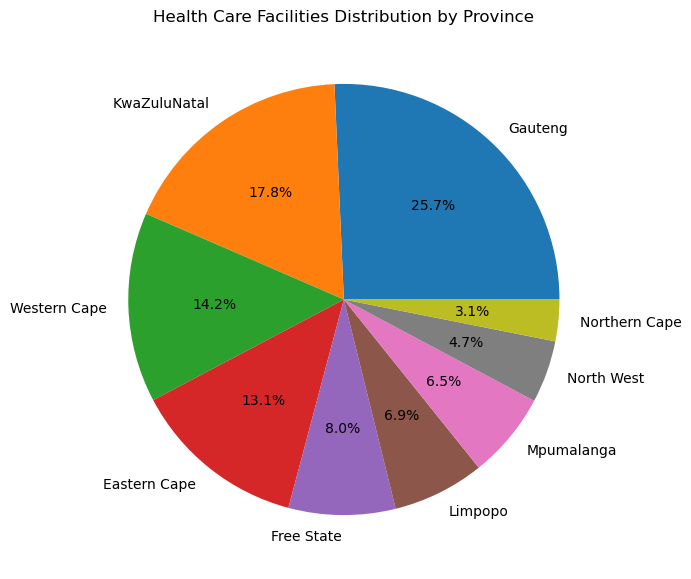

In [91]:
df['Province'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Health Care Facilities Distribution by Province')
plt.ylabel('')
plt.show()


We see that Gauteng has more health facilities but a province ike Mpumalanga with more mines doest really have many hostpitals which might be an issue

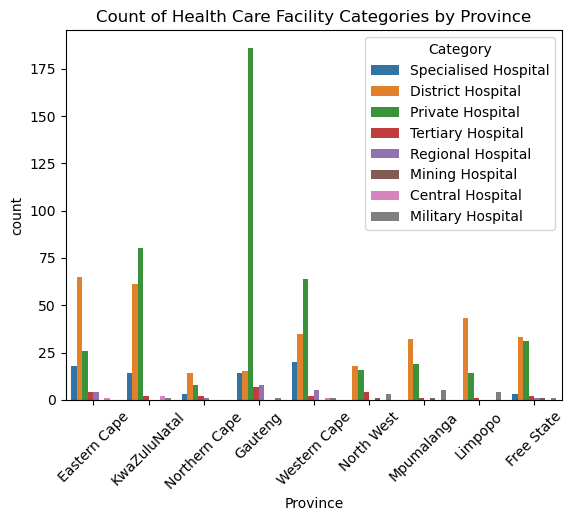

In [92]:
sns.countplot(data=df, x='Province', hue='Category')
plt.title('Count of Health Care Facility Categories by Province')
plt.xticks(rotation=45)
plt.show()


Majority of the provices here in South Africa have more private hostpitals that public which means that there is a lack of resouces for poor people

In [98]:
df = df.dropna(subset=['Lat', 'Long'])


In [99]:
import folium

m = folium.Map(location=[df['Lat'].mean(), df['Long'].mean()], zoom_start=6)

for _, row in df.iterrows():
    folium.Marker([row['Lat'], row['Long']], popup=row['Name']).add_to(m)

m.save('healthcare_facilities_map.html')


In [103]:
from scipy.spatial import ConvexHull


In [111]:
high_pm25_cities = data[data['Predicted_PM25'] > 50]

In [ ]:
if high_pm25_cities.empty:
    print("No cities found with PM2.5 > 50.")
else:
    # Create a Folium map centered on the first high PM2.5 city
    m = folium.Map(location=[high_pm25_cities['Lat'].mean(), high_pm25_cities['Long'].mean()], zoom_start=8)

    # Step 2: Loop through these cities and check hospitals
    for _, city_row in high_pm25_cities.iterrows():
        city_name = city_row['City']

        # Gather hospitals that are within a reasonable distance to the city
        df_city_hospitals = df[(df['Lat'] >= city_row['Lat'] - 1) & 
                                (df['Lat'] <= city_row['Lat'] + 1) & 
                                (df['Long'] >= city_row['Long'] - 1) & 
                                (df['Long'] <= city_row['Long'] + 1)]

        # If there are no hospitals close to the city, skip to the next city
        if len(df_city_hospitals) < 3:
            print(f"Not enough hospitals to create a convex hull for {city_name}.")
            continue

        # Step 3: Extract hospital coordinates and compute the convex hull
        points = df_city_hospitals[['Lat', 'Long']].dropna().values

        # Combine the city coordinates with hospital coordinates
        city_coordinates = np.array([[city_row['Lat'], city_row['Long']]])
        points = np.vstack((points, city_coordinates))  # Add city coordinates

        # Compute the convex hull
        hull = ConvexHull(points)

        # Create a list of convex hull coordinates
        hull_points = points[hull.vertices]

        # Create a Folium polygon for the convex hull
        folium.Polygon(locations=hull_points[:, ::-1], color='red', fill=True, fill_opacity=0.2).add_to(m)

        # Add hospitals to the map
        for _, hospital in df_city_hospitals.iterrows():
            folium.Marker(location=[hospital['Lat'], hospital['Long']],
                          popup=hospital['Name'],
                          icon=folium.Icon(color='blue')).add_to(m)

        # Add city marker with PM2.5 level
        folium.Marker(location=[city_row['Lat'], city_row['Long']],
                      popup=f"{city_name}: PM2.5 {city_row['Predicted_PM25']}",
                      icon=folium.Icon(color='green')).add_to(m)

    # Step 4: Save or display the map
    m.save('hospital_convex_hull_map.html')
    m

Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hospitals to create a convex hull for Prieska.
Not enough hos